In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#simulation parameters


Tc = 286
Th = 300

Tr = 293

L=75
alpha = 1.0
dx = 0.1
dt = (dx*dx)/(4*alpha)

To find $\tau_{dom}$ as a number times dt we use the fact that $L/dx = 750$ and $\tau_{dom} = L^2/2\pi^{2}\alpha$. Then, $\tau_{dom} = L^2/2\pi^{2}\alpha \times dt \times 4\alpha/dx^2$. Then

$\tau_{dom} = dt \left(\frac{L}{dx}\right)^2 \frac{2}{\pi^{2}}$

For manageable file size we investigate 0.01 (1140), 0.02 (2280), 0.03 (3540) times dominant timescale.

In [3]:
sparse_load = np.loadtxt('sparse_data.txt')
park_load = np.loadtxt('park_data.txt')

sparse_grid = sparse_load.reshape(sparse_load.shape[0], sparse_load.shape[1]//L, L)
park_grid = park_load.reshape(park_load.shape[0], park_load.shape[1]//L, L)

<ipython-input-70-94cd12edd2ea>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


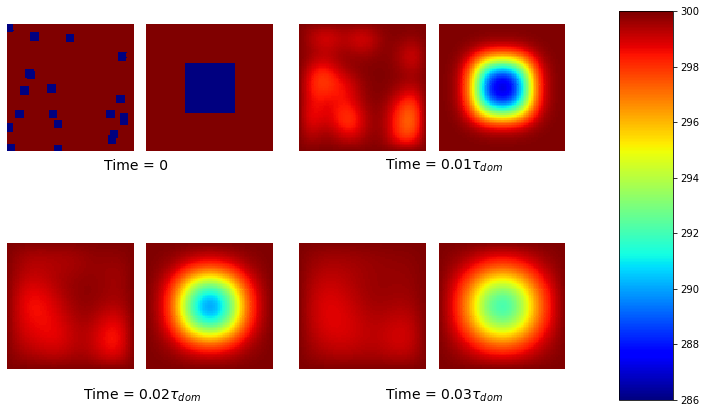

In [70]:
#making nested subplots

import matplotlib.gridspec as gridspec
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

text_dict = {'size': 14}

colormap_name=  'jet'
fig = plt.figure(figsize = (10, 8))
outer = gridspec.GridSpec(2, 2, wspace = 0.1, hspace = 0.01)



time_spacing = 1140

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.05)
    
    time_idx = time_spacing*i

    for j in range(2):
        ax = plt.Subplot(fig, inner[0,j])
        
        if j==0:
            hm = sns.heatmap(sparse_grid[time_idx], vmin = Tc, vmax = Th, cmap = colormap_name, ax=ax, cbar = False)
        else:
            hm = sns.heatmap(park_grid[time_idx], vmin = Tc, vmax = Th, cmap = colormap_name, ax=ax, cbar = False)
        
        hm.set(xticklabels = [])
        hm.set(yticklabels = [])
        
        ax.set_box_aspect(1)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        
cax = plt.axes([0.975, 0.15, 0.075, 0.675])
plt.colorbar(mappable = ScalarMappable(norm = Normalize(vmin = Tc, vmax = Th), cmap = colormap_name), cax=cax)
fig.text(0.26, 0.55, "Time = 0", fontdict = text_dict)
fig.text(0.65, 0.55, r'Time = $0.01\tau_{dom}$', fontdict = text_dict)
fig.text(0.23, 0.15, r'Time = $0.02\tau_{dom}$', fontdict = text_dict)
fig.text(0.65, 0.15, r'Time = $0.03\tau_{dom}$', fontdict = text_dict)

fig.show()